#### <i> Advancing Healthcare Outcomes with AI Predicting Hospital Readmissions in the USA </i>
#### <i> Dataset Link  ---> https://www.kaggle.com/datasets/vanpatangan/readmission-dataset </i>
#### <i> Import Library Files </i>

In [61]:
import pandas as pd
import numpy as np
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


#### <i> Load the Dataset </i>

In [62]:
train_data = pd.read_csv("train_df.csv")
test_data = pd.read_csv("test_df.csv")

#### <i> Dataset OVerview </i>

In [63]:
train_data


,age,gender,primary_diagnosis,num_procedures,days_in_hospital,comorbidity_score,discharge_to,readmitted
0,69,Male,Heart Disease,1,2,1,Home Health Care,0
1,32,Female,COPD,2,13,2,Rehabilitation Facility,0
2,89,Male,Diabetes,1,7,1,Home,0
3,78,Male,COPD,9,2,2,Skilled Nursing Facility,0
4,38,Male,Diabetes,6,4,4,Rehabilitation Facility,0
...,...,...,...,...,...,...,...,...
4995,77,Female,Heart Disease,3,13,1,Rehabilitation Facility,0
4996,43,Female,Heart Disease,3,9,3,Home Health Care,0
4997,58,Female,Kidney Disease,9,11,3,Home Health Care,0
4998,53,Male,COPD,6,1,0,Rehabilitation Facility,0


In [64]:
test_data

,age,gender,primary_diagnosis,num_procedures,days_in_hospital,comorbidity_score,discharge_to
0,52,Male,Heart Disease,3,9,3,Home
1,47,Female,Diabetes,2,4,0,Skilled Nursing Facility
2,72,Female,Heart Disease,7,12,4,Home
3,18,Female,COPD,5,14,3,Home
4,32,Male,Heart Disease,9,2,4,Rehabilitation Facility
...,...,...,...,...,...,...,...
1995,35,Female,Kidney Disease,7,4,4,Home
1996,65,Male,Hypertension,5,3,2,Home Health Care
1997,89,Female,Kidney Disease,2,7,2,Rehabilitation Facility
1998,83,Female,Diabetes,4,4,0,Rehabilitation Facility


In [65]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                5000 non-null   int64 
 1   gender             5000 non-null   object
 2   primary_diagnosis  5000 non-null   object
 3   num_procedures     5000 non-null   int64 
 4   days_in_hospital   5000 non-null   int64 
 5   comorbidity_score  5000 non-null   int64 
 6   discharge_to       5000 non-null   object
 7   readmitted         5000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 312.6+ KB


In [66]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                2000 non-null   int64 
 1   gender             2000 non-null   object
 2   primary_diagnosis  2000 non-null   object
 3   num_procedures     2000 non-null   int64 
 4   days_in_hospital   2000 non-null   int64 
 5   comorbidity_score  2000 non-null   int64 
 6   discharge_to       2000 non-null   object
dtypes: int64(4), object(3)
memory usage: 109.5+ KB


In [67]:
train_data.describe()

,age,num_procedures,days_in_hospital,comorbidity_score,readmitted
count,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,53.299000,4.46100,7.396600,2.068600,0.188000
std,20.646851,2.88606,4.025587,1.422357,0.390751
min,18.000000,0.00000,1.000000,0.000000,0.000000
25%,36.000000,2.00000,4.000000,1.000000,0.000000
50%,53.000000,4.00000,7.000000,2.000000,0.000000
75%,71.000000,7.00000,11.000000,3.000000,0.000000
max,89.000000,9.00000,14.000000,4.000000,1.000000


In [68]:
test_data.describe()

,age,num_procedures,days_in_hospital,comorbidity_score
count,2000.000000,2000.000000,2000.00000,2000.00000
mean,54.318000,4.563000,7.41950,2.05300
std,20.872631,2.846767,3.99944,1.40932
min,18.000000,0.000000,1.00000,0.00000
25%,36.000000,2.000000,4.00000,1.00000
50%,55.000000,5.000000,7.00000,2.00000
75%,72.000000,7.000000,11.00000,3.00000
max,89.000000,9.000000,14.00000,4.00000


#### <i> Data Visulization And Analysis </i>

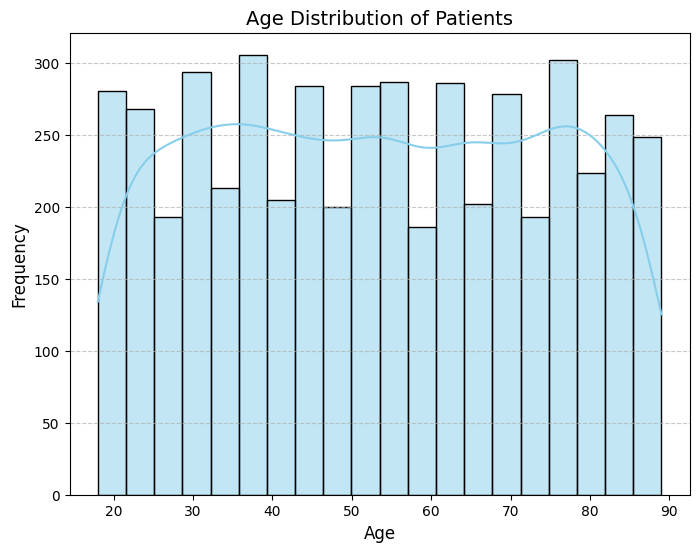

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(train_data["age"], kde=True, bins=20, color="skyblue")
plt.title("Age Distribution of Patients", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


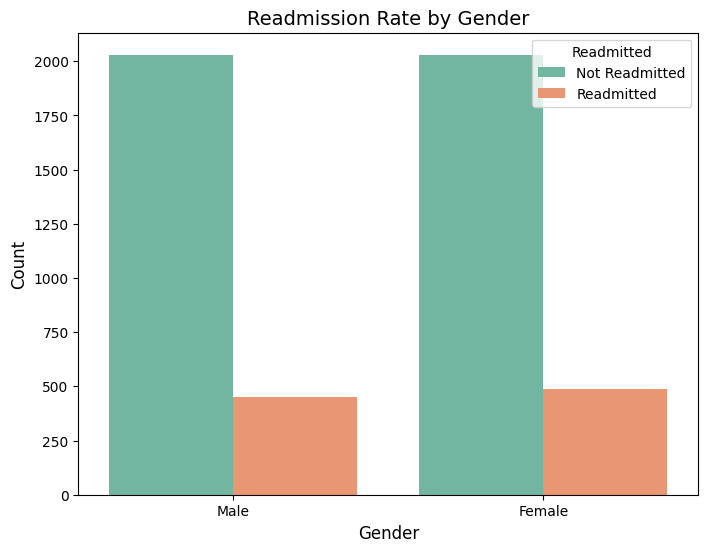

In [70]:
# Readmission rate by gender
plt.figure(figsize=(8, 6))
sns.countplot(x="gender", hue="readmitted", data=train_data, palette="Set2")
plt.title("Readmission Rate by Gender", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Readmitted", loc="upper right", labels=["Not Readmitted", "Readmitted"])
plt.show()


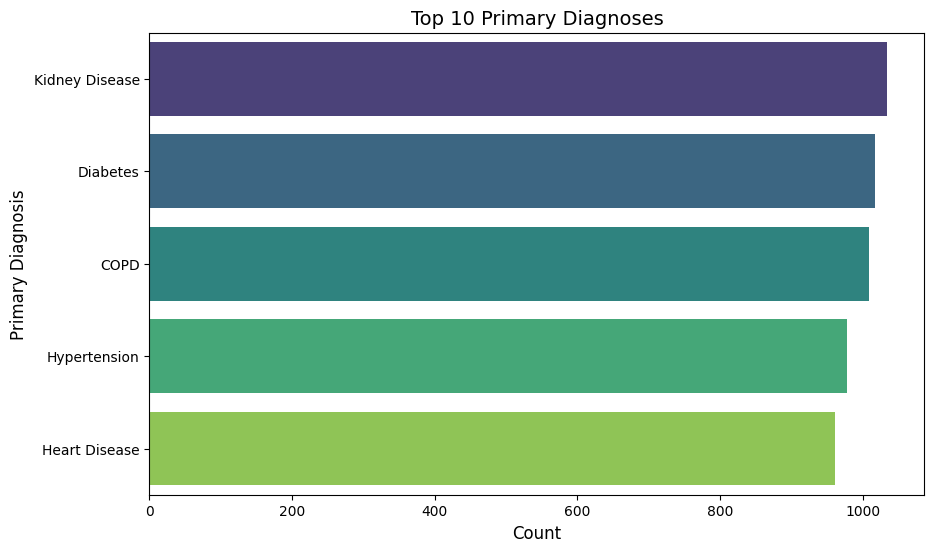

In [71]:
# Top primary diagnoses
plt.figure(figsize=(10, 6))
top_diagnoses = train_data["primary_diagnosis"].value_counts().head(10)
sns.barplot(x=top_diagnoses.values, y=top_diagnoses.index, palette="viridis")
plt.title("Top 10 Primary Diagnoses", fontsize=14)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Primary Diagnosis", fontsize=12)
plt.show()


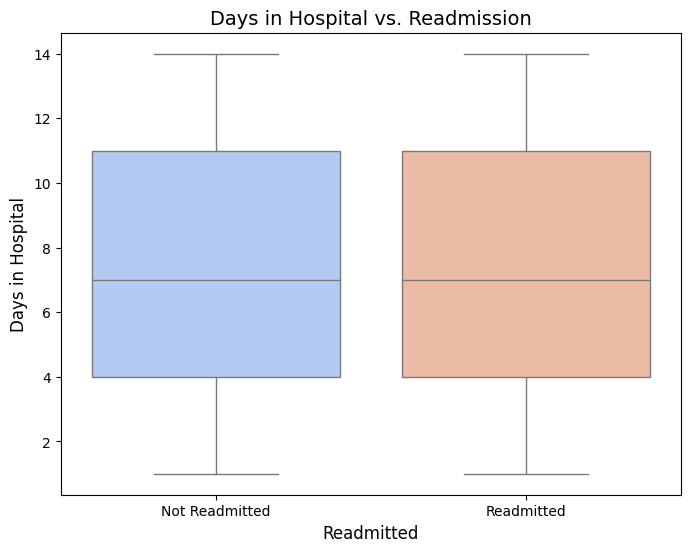

In [72]:
# Days in hospital vs. readmission
plt.figure(figsize=(8, 6))
sns.boxplot(x="readmitted", y="days_in_hospital", data=train_data, palette="coolwarm")
plt.title("Days in Hospital vs. Readmission", fontsize=14)
plt.xlabel("Readmitted", fontsize=12)
plt.ylabel("Days in Hospital", fontsize=12)
plt.xticks([0, 1], ["Not Readmitted", "Readmitted"])
plt.show()


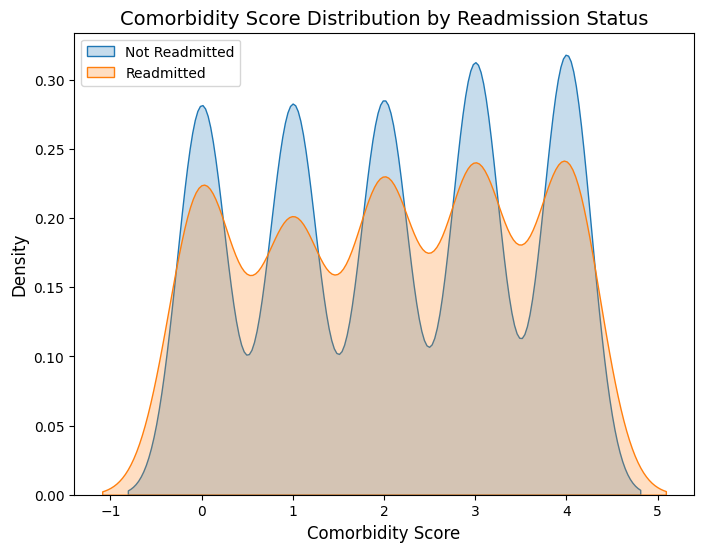

In [73]:
# Comorbidity score distribution
plt.figure(figsize=(8, 6))
sns.kdeplot(data=train_data[train_data["readmitted"] == 0]["comorbidity_score"], label="Not Readmitted", shade=True)
sns.kdeplot(data=train_data[train_data["readmitted"] == 1]["comorbidity_score"], label="Readmitted", shade=True)
plt.title("Comorbidity Score Distribution by Readmission Status", fontsize=14)
plt.xlabel("Comorbidity Score", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.show()


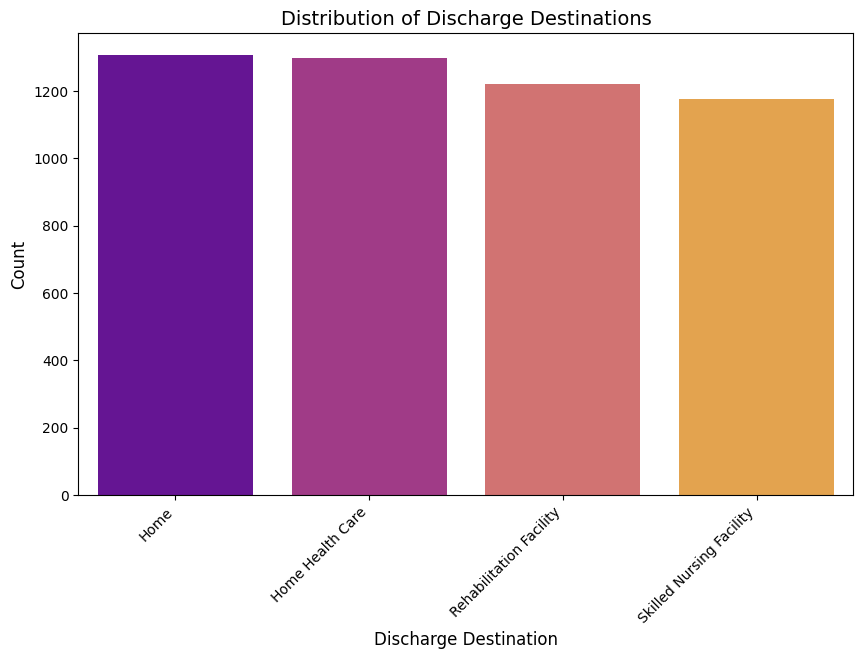

In [74]:
# Discharge destination
plt.figure(figsize=(10, 6))
discharge_counts = train_data["discharge_to"].value_counts()
sns.barplot(x=discharge_counts.index, y=discharge_counts.values, palette="plasma")
plt.title("Distribution of Discharge Destinations", fontsize=14)
plt.xlabel("Discharge Destination", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()


In [75]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

#### <i> Data Preprocessing </i>

In [76]:
#Separate features and target
X = train_data.drop(columns=["readmitted"])
y = train_data["readmitted"]

# Define categorical and numerical features
categorical_features = ["gender", "primary_diagnosis", "discharge_to"]
numerical_features = ["age", "num_procedures", "days_in_hospital", "comorbidity_score"]

# Preprocessing pipeline
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Split training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocess the test data
X_test = test_data.copy()

#### </i> Modeling </i>
#### <i> Logistic Regression </i>

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create the pipeline
logreg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=500, class_weight="balanced"))
])

# Train the model
logreg_pipeline.fit(X_train, y_train)

# Evaluate the model
y_val_pred = logreg_pipeline.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Logistic Regression Model Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_val, y_val_pred))


Logistic Regression Model Accuracy: 0.501
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.50      0.62       812
           1       0.19      0.49      0.27       188

    accuracy                           0.50      1000
   macro avg       0.50      0.50      0.45      1000
weighted avg       0.69      0.50      0.55      1000



#### <i> Random Forest Classifier </i>

In [78]:
from sklearn.ensemble import RandomForestClassifier

# Create the pipeline
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced"))
])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Evaluate the model
y_val_pred = rf_pipeline.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Random Forest Model Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_val, y_val_pred))


Random Forest Model Accuracy: 0.803
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       812
           1       0.15      0.01      0.02       188

    accuracy                           0.80      1000
   macro avg       0.48      0.50      0.46      1000
weighted avg       0.69      0.80      0.73      1000



#### <i> Gradient Boosting Classifier </i>

In [79]:
from sklearn.ensemble import GradientBoostingClassifier

# Create the pipeline
gb_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
])

# Train the model
gb_pipeline.fit(X_train, y_train)

# Evaluate the model
y_val_pred = gb_pipeline.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Gradient Boosting Model Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_val, y_val_pred))


Gradient Boosting Model Accuracy: 0.811
Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90       812
           1       0.00      0.00      0.00       188

    accuracy                           0.81      1000
   macro avg       0.41      0.50      0.45      1000
weighted avg       0.66      0.81      0.73      1000



#### <i> Comparison Of Models </i>

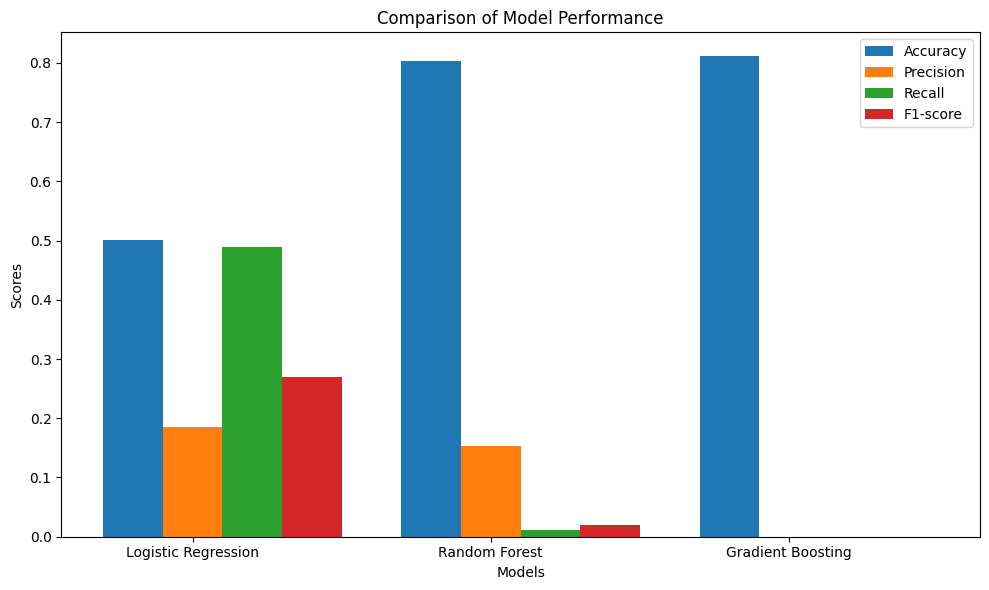

In [80]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate all models on validation set
models = {
    "Logistic Regression": logreg_pipeline,
    "Random Forest": rf_pipeline,
    "Gradient Boosting": gb_pipeline
}

metrics = {
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-score": []
}

# Calculate metrics for each model
for name, model in models.items():
    y_val_pred = model.predict(X_val)
    metrics["Accuracy"].append(accuracy_score(y_val, y_val_pred))
    metrics["Precision"].append(precision_score(y_val, y_val_pred, average="binary"))
    metrics["Recall"].append(recall_score(y_val, y_val_pred, average="binary"))
    metrics["F1-score"].append(f1_score(y_val, y_val_pred, average="binary"))

# Visualization of comparison
metrics_names = list(metrics.keys())
model_names = list(models.keys())
bar_width = 0.2
x_indexes = np.arange(len(model_names))

# Plot metrics
plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics_names):
    plt.bar(x_indexes + i * bar_width, metrics[metric], width=bar_width, label=metric)

# Formatting the plot
plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Comparison of Model Performance")
plt.xticks(x_indexes + bar_width, model_names)
plt.legend()
plt.tight_layout()
plt.show()
